In [2]:
from pylab import *
%run integradores.ipynb
%matplotlib inline

In [3]:
inicial = array([1,1,1])
dominio = [0,30]

def sistema(x,t):
    x,y,z = x[0:3]
    x_dot = 10*(y-x)
    y_dot = x*(28-z)-y
    z_dot = x*y-8.0*z/3
    return array([x_dot,y_dot,z_dot])

In [4]:
t,sol = int_rk4(sistema,inicial,dominio,h=0.01)

In [5]:
sol

array([[  1.        ,   1.        ,   1.        ],
       [  1.01256719,   1.2599178 ,   0.98489097],
       [  1.04882371,   1.52399713,   0.97311422],
       ..., 
       [ 10.87239928,   6.10073738,  34.8025506 ],
       [ 10.38075528,   5.33638393,  34.4859547 ],
       [  9.86686086,   4.64963269,  34.07676647]])

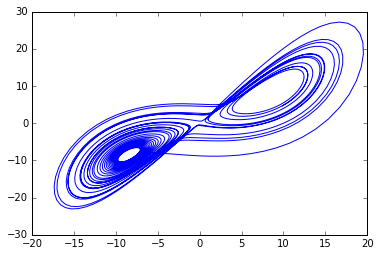

In [8]:
plot(sol[:,0],sol[:,1])